# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Read in the data set
house_df = pd.read_csv('ames.csv')


In [3]:
# Clean and pre-process the data if neccessary. Filtering out all the other columns so we only have those we need. 
filtered_df = house_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]

filtered_df.head()

,Gr_Liv_Area,Garage_Area,Sale_Price
0,1656,528,215000
1,896,730,105000
2,1329,312,172000
3,2110,522,244000
4,1629,482,189900


In [4]:
# We have to check for nan values so that we can remove them, if need be and be able to do predictions properly. 
filtered_df.isnull().sum()

Gr_Liv_Area    0
Garage_Area    0
Sale_Price     0
dtype: int64

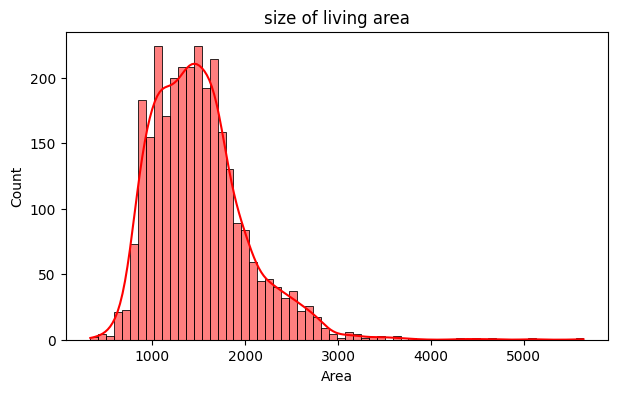

In [5]:
# Explore the data with visualisations such as histograms and correlation matrices

plt.figure(figsize=(7, 4))
sns.histplot(data=filtered_df, x='Gr_Liv_Area', color='red', label='Ground living area', kde=True)

plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Size of living area')
plt.show()

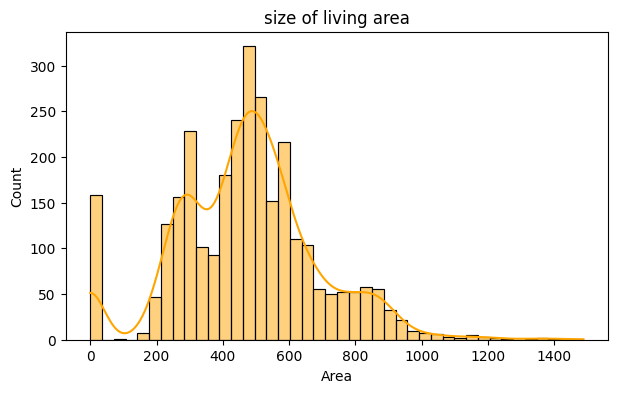

In [6]:
plt.figure(figsize=(7, 4))
sns.histplot(data=filtered_df, x='Garage_Area', color='orange', label='Garage area', kde=True)

plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Size of living area')
plt.show()

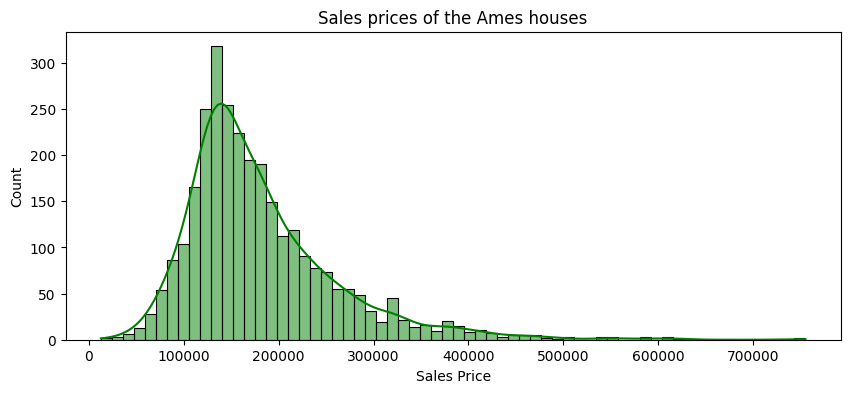

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(data=filtered_df, x='Sale_Price', color='green', label='Sales Price', kde=True)

plt.xlabel('Sales Price')
plt.ylabel('Count')
plt.title('Sales prices of the Ames houses')
plt.show()

In [8]:
# Split the independent variables from the dependent variable, x being our independent variables. 
X = filtered_df.iloc[:,0:2].values
X[0:4]


array([[1656,  528],
       [ 896,  730],
       [1329,  312],
       [2110,  522]], dtype=int64)

In [9]:
# Splitting our dependent variable, sales price. 
y = filtered_df.iloc[:, 2].values
y = y.reshape(-1, 1)
X = X.reshape(-1, 2)


In [10]:
# We also just checking the actual correaltion between the variables.
print("Correlation of numeric features to SalesPrice")
corr = filtered_df.corr()
corr.sort_values(["Sale_Price"], ascending = False, inplace = True)
print(corr.Sale_Price)


Correlation of numeric features to SalesPrice
Sale_Price     1.000000
Gr_Liv_Area    0.706780
Garage_Area    0.640138
Name: Sale_Price, dtype: float64


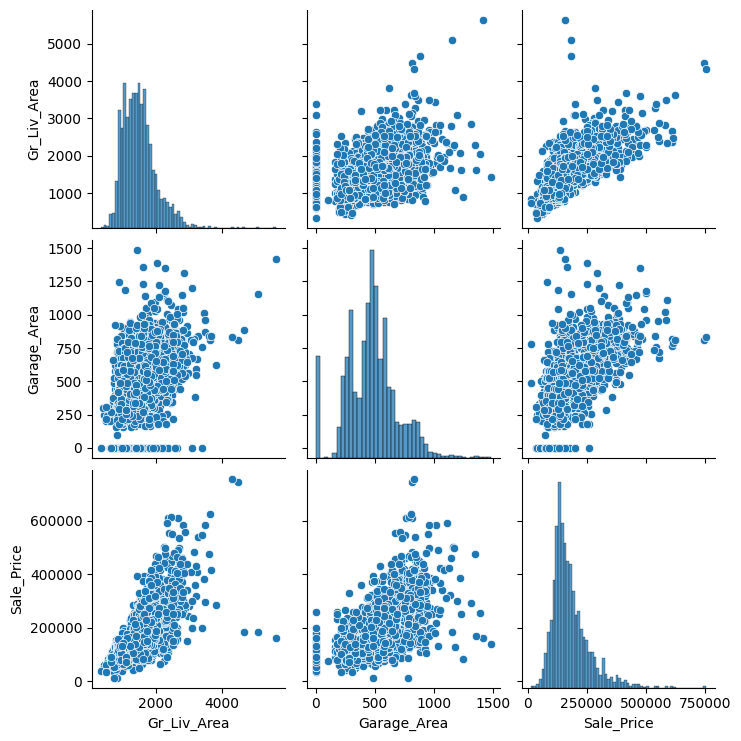

In [11]:
# Explore relationships between the independent and dependent variables

sns.pairplot(filtered_df)


In [12]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (2197, 2) (2197, 1)
Test data: (733, 2) (733, 1)


In [13]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [14]:
# Print the model intercept and coefficients

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 [-8781.76221374]
Coefficients: 
 [[ 80.48029229 146.28540089]]


In [15]:
# Generate predictions for the test set
y_predict = lr.predict(X_test)
y_predict[0:5]


array([[166498.93282138],
       [ 95922.27301235],
       [187917.05999515],
       [243400.34603163],
       [211333.55999847]])

In [16]:
# Evaluate the model
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print("The mean squared error is:", MSE)
print("The root mean squared error is:", RMSE)


The mean squared error is: 2782312569.158005
The root mean squared error is: 52747.63093408087


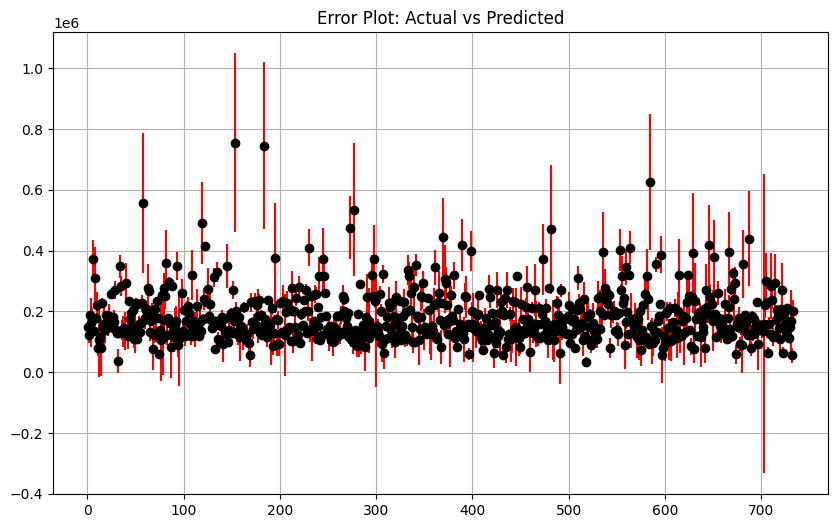

In [17]:
# Generate a plot and flatten residuals to avoid an error of 'yerr' not having the same shape. 
residuals = y_test - y_predict

absolute_residuals = np.abs(residuals).flatten()


plt.figure(figsize=(10, 6))
plt.errorbar(range(1, 734), y_test.flatten(), yerr=absolute_residuals, fmt='o', color='black', ecolor='red')
plt.title('Error Plot: Actual vs Predicted')
plt.grid(True)
plt.show()


In [18]:
# Print the coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [[ 80.48029229 146.28540089]]
Intercept: 
 [-8781.76221374]


**Interpret coefficients in the context of the prediction:**
Looking at both the coefficients, they show us that both the variables have a positive impact on the sale price. The garage area has the stronger impact of increasing the sales by 146 dollars per square meter, provided the ground living area remains the same. While the ground living area only increases it by 80.48 dollars per square unit. 

**Summarise findings**
When looking at the data in the exploratory data analysis, we can see the variables, on their own, are skewed to the right. The data also shows us that our independent variables have a somewhat of a great correlation to the sale price. The greater the size of the areas, the higher the cost goes. There are, however, a few instances where the data doesn’t follow this trend but the data that isn’t part of this project could have an impact on that. Looking at the error plot, we can see the predictions were not too far off from the actual values.

**References:**
https://www.javatpoint.com/rsme-root-mean-square-error-in-python
https://www.youtube.com/watch?v=QiqZliDXCCg&ab_channel=IBMTechnology
https://www.youtube.com/watch?v=5h3hHAYXQ0A&ab_channel=Koolac
https://www.youtube.com/watch?v=wH_ezgftiy0&ab_channel=RegenerativeToday
https://matplotlib.org/stable/plot_types/stats/errorbar_plot.html
https://www.youtube.com/watch?v=Wqmtf9SA_kk&ab_channel=NeuralNine
https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
